In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization



In [5]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set base_dir to the path in your Google Drive where your dataset is stored
base_dir = '/content/drive/MyDrive/flowers'
img_size = 224
batch = 64



Mounted at /content/drive


In [6]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)


Found 3405 images belonging to 5 classes.
Found 848 images belonging to 5 classes.


In [7]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
				activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

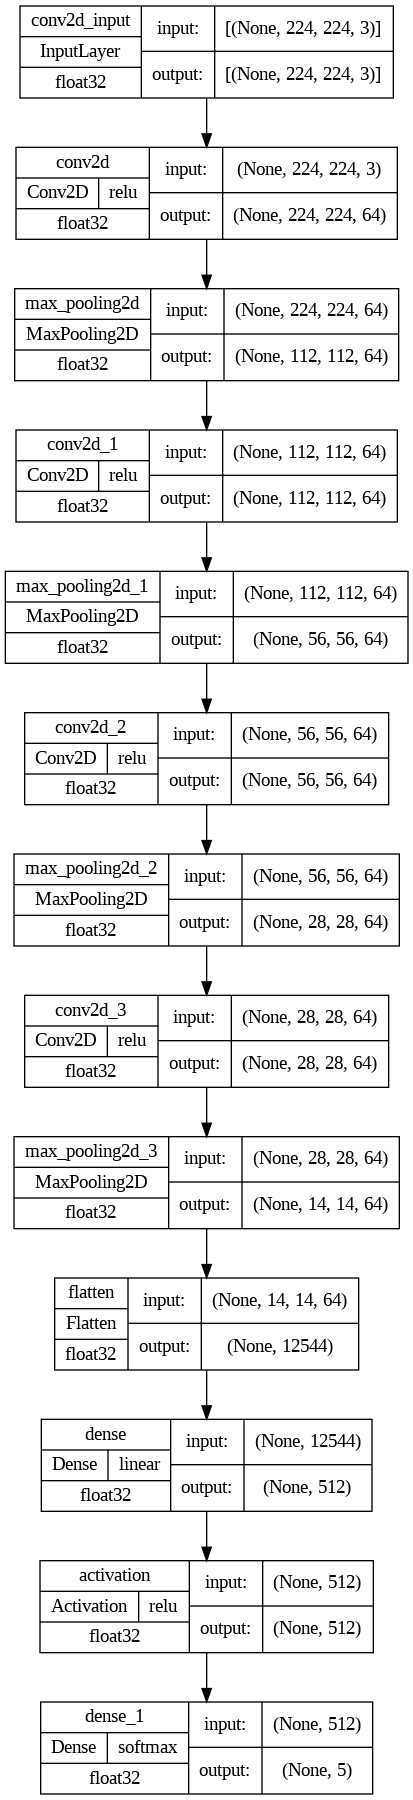

In [9]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
			loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
epochs=10
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/10
54/54 [==============================] - 1288s 24s/step - loss: 1.4397 - accuracy: 0.3504 - val_loss: 1.1624 - val_accuracy: 0.5047
Epoch 2/10
54/54 [==============================] - 61s 1s/step - loss: 1.1389 - accuracy: 0.5369 - val_loss: 1.0478 - val_accuracy: 0.5660
Epoch 3/10
54/54 [==============================] - 60s 1s/step - loss: 1.0413 - accuracy: 0.5880 - val_loss: 0.9995 - val_accuracy: 0.5991
Epoch 4/10
54/54 [==============================] - 61s 1s/step - loss: 0.9352 - accuracy: 0.6314 - val_loss: 0.9048 - val_accuracy: 0.6568
Epoch 5/10
54/54 [==============================] - 59s 1s/step - loss: 0.8546 - accuracy: 0.6720 - val_loss: 0.9039 - val_accuracy: 0.6580
Epoch 6/10
54/54 [==============================] - 59s 1s/step - loss: 0.8193 - accuracy: 0.6849 - val_loss: 0.8609 - val_accuracy: 0.6792
Epoch 7/10
54/54 [==============================] - 63s 1s/step - loss: 0.7650 - accuracy: 0.7046 - val_loss: 0.8519 - val_accuracy: 0.6875
Epoch 8/10
54/54 

In [18]:
from tensorflow.keras.models import load_model
model.save('Model.h5')

# load model
savedModel=load_model('Model.h5')


In [19]:
train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

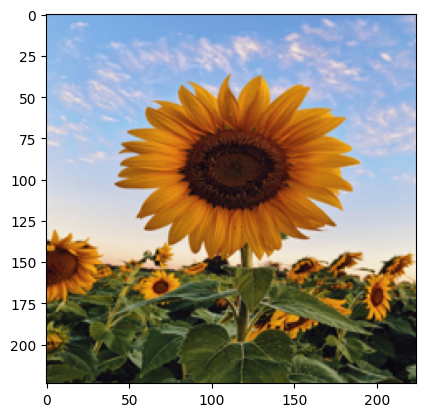

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 1. 0.]]
Sunflower


In [40]:
from PIL import Image
import requests
import numpy as np
import io
import matplotlib.pyplot as plt

# Creating list for mapping
list_ = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

# HTTPS URL of the image
# daisy : 'https://hips.hearstapps.com/hmg-prod/images/marguerite-daisy-types-1586981163.jpg'
# tulip: 'https://plus.unsplash.com/premium_photo-1677620614560-5f1b32416563?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8dHVsaXB8ZW58MHx8MHx8fDA%3D&w=1000&q=80'
# rose: 'https://c1.wallpaperflare.com/preview/653/702/399/rose-flower-flowers-red-rose.jpg'
# Dandelion: 'https://cdn.britannica.com/44/5644-050-F793FA67/dandelion-head-flowers.jpg'
# sunflower: 'https://images.unsplash.com/photo-1597848212624-a19eb35e2651?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8fA%3D%3D&w=1000&q=80'
image_url = 'https://images.unsplash.com/photo-1597848212624-a19eb35e2651?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8fA%3D%3D&w=1000&q=80'
# Download the image using requests
response = requests.get(image_url)
image_data = response.content

# Convert image data to PIL Image
test_image = Image.open(io.BytesIO(image_data)).convert("RGB")
test_image = test_image.resize((224, 224))  # Resize to the target size
test_image = np.array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# For showing the image
plt.imshow(np.uint8(test_image[0]))  # Convert to uint8 before displaying
plt.show()

# Result array
result = savedModel.predict(test_image)
print(result)

# Mapping result array with the main name list
i = np.argmax(result)  # Get the index with the highest probability
print(list_[i])
